# 🧠 생성 학습 알고리즘 (Generative Learning Algorithms)

## **📌 1. 생성 학습 알고리즘의 개념**

### **🔹 생성 학습 알고리즘(Generative Learning Algorithms)이란?**

> "$P(X, Y)$를 모델링하여 데이터를 생성할 수 있도록 학습하는 방식"
> 
> 
> 데이터를 단순히 구분하는 것이 아니라, 데이터가 어떻게 생성되는지(확률 분포)를 학습하는 방식
> 

생성 학습 알고리즘은 주어진 데이터에서 **확률 분포 $P(X, Y)$** 를 학습한 후, 이를 사용하여 $P(Y \mid X)$ 를 계산하는 방식입니다.

즉, **입력 X가 주어졌을 때, 어떤 $Y$가 나올 확률을 베이즈 정리를 통해 계산하는 모델**

### **🔹 생성 학습 알고리즘 vs 판별 학습 알고리즘**

✅ **생성 학습(GDA, Naive Bayes)**

- **결합 확률 분포 $P(X, Y)$를 학습**
- 베이즈 정리를 사용하여 **사후 확률 $P(Y \mid X$)를 계산**
- 데이터가 특정 확률 분포를 따른다고 가정 (예: 가우시안 분포)
- **예시:** 가우시안 판별 분석(GDA), 나이브 베이즈(Naive Bayes)

✅ **판별 학습(Logistic Regression, SVM)**

- **$P(Y \mid X)$를 직접 학습**
- 데이터의 경계를 찾는 방식으로 학습 (결정 경계 기반)
- 데이터의 분포를 직접 모델링하지 않음
- **예시:** 로지스틱 회귀(Logistic Regression), 서포트 벡터 머신(SVM)

## **📌 2. 생성 학습 알고리즘의 핵심 원리**

### **🔹 베이즈 정리를 활용한 분류 과정**

생성 학습 알고리즘은 베이즈 정리를 사용하여 $P(Y \mid X)$ 를 계산합니다.

$P(Y \mid X) = \frac{P(X \mid Y) P(Y)}{P(X)}$

- **P(Y)**: 사전 확률 (Prior Probability) → 클래스 Y가 발생할 확률
- **$P(X \mid Y)$**: 우도 (Likelihood) → 특정 클래스 Y가 주어졌을 때 X가 나올 확률
- **P(X):** 정규화 상수 (Evidence) → 모든 가능한 Y에 대해 P(X, Y) 를 합한 값
- **$P(Y \mid X$)**: 사후 확률 (Posterior Probability) → 주어진 X에 대해 Y가 될 확률

> 사후 확률이 가장 큰 클래스를 선택하여 분류를 수행
>

### **🔹 결정 경계 (Decision Boundary)란?**

✅ **결정 경계**란,  $P(Y = 1 \mid X)$와 $P(Y = 0 \mid X)$이 같아지는 지점을 의미합니다.

✅ 즉, 특정 X에서 **$P(Y = 1 \mid X) = P(Y = 0 \mid X)$** 가 되는 경계를 계산하면 됩니다.

$P(X)\frac{P(X \mid Y = 1) P(Y = 1)}{P(X)} = \frac{P(X \mid Y = 0) P(Y = 0)}{P(X)}$

위 식을 정리하면, **결정 경계는 선형 또는 이차 함수 형태**로 나타날 수 있습니다.

## **📌 3. 가우시안 판별 분석(GDA, Gaussian Discriminant Analysis)**

### **🔹 GDA의 기본 가정**

✅ 각 클래스 $Y$에 대해 $X$는 **가우시안(정규) 분포**를 따른다고 가정

$X∣Y=0∼N(μ0,Σ)$

$X∣Y=1∼N(μ1,Σ)$

- $\mu_0, \mu_1$: 각 클래스의 평균 벡터
- $\Sigma$: **공통 공분산 행렬 (모든 클래스에서 동일)**

✅ P(Y)는 사전 확률로 설정

$P(Y=1)=ϕ,  P(Y=0)=1−ϕ$

> 즉, GDA는 각 클래스가 동일한 공분산을 가진 가우시안 분포에서 생성되었다고 가정하는 모델
>

### **🔹 GDA에서 학습해야 할 파라미터**

- **사전 확률 $\phi$**
- **클래스별 평균   $\mu_0, \mu_1$**
- **공통 공분산 행렬 $\Sigma$**

MLE(최대우도추정)를 통해 다음과 같이 추정됩니다.

$\hat{\phi} = \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}(y_i = 1)$

$\hat{\mu_0} = \frac{\sum_{i: y_i = 0} x_i}{\sum_{i=1}^{n} \mathbb{1}(y_i = 0)}$

$\hat{\mu_1} = \frac{\sum_{i: y_i = 1} x_i}{\sum_{i=1}^{n} \mathbb{1}(y_i = 1)}$

$\hat{\Sigma} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu_{y_i}) (x_i - \mu_{y_i})^T$

GDA 파라미터 추정

In [3]:
def estimate_gda_parameters(X, y):
    """GDA의 MLE 기반 파라미터 추정"""
    phi = np.mean(y)  # P(Y=1) 추정

    # 각 클래스의 평균 벡터
    mu_0 = np.mean(X[y == 0], axis=0)
    mu_1 = np.mean(X[y == 1], axis=0)

    # 공분산 행렬 추정 (두 클래스에 대해 동일한 공분산 사용)
    sigma = np.cov(X.T, bias=True)

    return phi, mu_0, mu_1, sigma

# MLE 적용하여 GDA 파라미터 추정
phi_hat, mu_0_hat, mu_1_hat, sigma_hat = estimate_gda_parameters(X, Y)
print(f"Estimated phi: {phi_hat:.4f}")
print(f"Estimated mu_0: {mu_0_hat}")
print(f"Estimated mu_1: {mu_1_hat}")
print(f"Estimated Sigma: \n{sigma_hat}")


Estimated phi: 0.5000
Estimated mu_0: [-1.91692958 -1.88290726]
Estimated mu_1: [1.86718952 1.91067717]
Estimated Sigma: 
[[4.46197027 4.03068907]
 [4.03068907 4.52584748]]


 가우시안 판별 분석(GDA) 구현 (Python)

c:\Users\hjjung\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


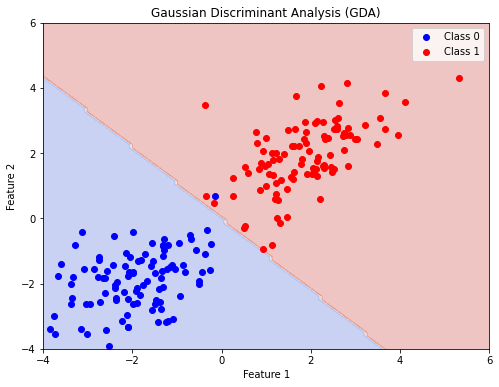

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1️⃣ 샘플 데이터 생성 (2D 예제)
np.random.seed(42)

# 클래스 0 (평균: [-2, -2], 공분산: [[1, 0.5], [0.5, 1]])
mu_0 = np.array([-2, -2])
sigma = np.array([[1, 0.5], [0.5, 1]])
X0 = np.random.multivariate_normal(mu_0, sigma, 100)

# 클래스 1 (평균: [2, 2], 동일한 공분산 행렬)
mu_1 = np.array([2, 2])
X1 = np.random.multivariate_normal(mu_1, sigma, 100)

# 라벨 설정
Y0 = np.zeros(len(X0))
Y1 = np.ones(len(X1))

# 데이터 합치기
X = np.vstack((X0, X1))
Y = np.hstack((Y0, Y1))

# 2️⃣ GDA 모델 학습 (MLE를 이용한 파라미터 추정)
phi = np.mean(Y)  # 클래스 1의 비율
mu_0_hat = np.mean(X[Y == 0], axis=0)  # 클래스 0 평균
mu_1_hat = np.mean(X[Y == 1], axis=0)  # 클래스 1 평균

# 공분산 행렬 계산 (모든 클래스에서 동일한 공분산 사용)
sigma_hat = np.cov(X.T, bias=True)

# 3️⃣ GDA 예측 함수
def predict_gda(X):
    """입력 X에 대해 GDA를 사용하여 클래스 예측"""
    p_x_given_y0 = multivariate_normal.pdf(X, mean=mu_0_hat, cov=sigma_hat)
    p_x_given_y1 = multivariate_normal.pdf(X, mean=mu_1_hat, cov=sigma_hat)
    
    # 사후 확률 계산 (베이즈 정리 적용)
    p_y0_x = p_x_given_y0 * (1 - phi)
    p_y1_x = p_x_given_y1 * phi
    
    return (p_y1_x > p_y0_x).astype(int)  # 더 높은 확률을 가진 클래스로 예측

# 4️⃣ 데이터 시각화 및 결정 경계 그리기
xx, yy = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict_gda(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X0[:, 0], X0[:, 1], label="Class 0", color="blue")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", color="red")
plt.legend()
plt.title("Gaussian Discriminant Analysis (GDA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## **📌 4. GDA와 로지스틱 회귀(Logistic Regression) 비교**

### **🔹 GDA와 로지스틱 회귀의 차이점**

|  | **GDA (생성 모델)** | **로지스틱 회귀 (판별 모델)** |
| --- | --- | --- |
| 학습 방식 | P(X, Y)를 학습하여 P(Y \mid X) 계산 | P(Y \mid X)를 직접 학습 |
| 가정 | 데이터가 가우시안 분포를 따른다고 가정 | 확률 분포 가정 없음 |
| 학습 과정 | MLE를 사용하여 닫힌 해(closed-form solution) 계산 | 경사 하강법(Gradient Descent)으로 최적화 |
| 결정 경계 | 선형 또는 이차 결정 경계 | 선형 결정 경계 |

✅ **GDA는 데이터가 정규 분포를 따를 때 강력한 성능을 보임**

✅ **로지스틱 회귀는 일반적으로 더 유연하며, 더 다양한 데이터에 적용 가능**

In [4]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 훈련
log_reg = LogisticRegression()
log_reg.fit(X, Y)

# 예측 확률 출력 (GDA vs Logistic Regression)
x_test = np.array([[0, 0], [1, 1], [-1, -1], [2, 2], [-2, -2]])

print("GDA 예측 확률:")
print(predict_gda(x_test))

print("로지스틱 회귀 예측 확률:")
print(log_reg.predict_proba(x_test)[:, 1])  # 클래스 1의 확률만 출력


GDA 예측 확률:
[1 1 0 1 0]
로지스틱 회귀 예측 확률:
[0.58227367 0.98094923 0.03636223 0.99947454 0.00102046]


## **📌 5. GDA의 장점과 단점**

### **🔹 GDA의 장점**

✅ **매우 효율적** → MLE를 사용하여 학습이 빠름

✅ **확률 분포를 명확하게 모델링 가능**

✅ **데이터가 정규 분포를 따를 경우 높은 정확도 제공**

### **🔹 GDA의 단점**

❌ **데이터가 정규 분포를 따르지 않을 경우 성능이 저하됨**

❌ **공분산 행렬이 모든 클래스에서 동일해야 하는 제약이 있음**

---

## **📌 6. 가우시안 판별 분석(GDA)의 예측 과정**

### **🔹 새로운 데이터에 대한 예측 방법**

GDA 모델을 학습한 후, 새로운 데이터 포인트 X에 대해 가장 가능성이 높은 클래스 Y를 예측하는 과정

1. **사후 확률P(Y∣X) 계산**
    
    베이즈 정리를 사용하여 각 클래스 Y에 대한 확률을 계산합니다.
    
    $P(Y \mid X) = \frac{P(X \mid Y) P(Y)}{P(X)}$
    
2. **사후 확률이 더 큰 클래스 선택**
    
    $P(Y=1∣X)와 P(Y=0∣X)$를 비교하여 더 큰 값을 가지는 클래스를 선택합니다.
    
    $\hat{Y} = \arg\max_{Y} P(Y | X)$
    
3. **P(X∣Y)는 가우시안 밀도 함수 사용**
    
    각 클래스 Y에 대해 X가 가우시안 분포를 따른다고 가정하므로,
    
    다음과 같은 정규 분포의 밀도 함수를 사용하여 P(X∣Y)를 계산합니다.
    
    $P(X | Y) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (X - \mu_Y)^T \Sigma^{-1} (X - \mu_Y) \right)$
    
    ---

## **📌 7. GDA의 결정 경계 (Decision Boundary)**

### **🔹 결정 경계란?**

✅ **결정 경계**는 두 클래스 간의 확률이 동일해지는 지점입니다.

✅ 즉, 특정 X에서$P(Y = 1 \mid X) = P(Y = 0 \mid X)$가 되는 경계를 계산하면 됩니다.

### **🔹 GDA의 결정 경계 유도**

사후 확률이 0.5가 되는 지점을 찾으면, 다음과 같은 관계식을 얻을 수 있습니다.

$\frac{P(X | Y = 1) P(Y = 1)}{P(X)} = \frac{P(X | Y = 0) P(Y = 0)}{P(X)}$

이를 정리하면, **결정 경계는 선형 방정식의 형태**를 가질 수 있습니다.

$X^T \Sigma^{-1} (\mu_1 - \mu_0) - \frac{1}{2} (\mu_1^T \Sigma^{-1} \mu_1 - \mu_0^T \Sigma^{-1} \mu_0) + \log \frac{\phi}{1 - \phi} = 0$

위 식에서 확인할 수 있듯이, **GDA의 결정 경계는 선형이거나 이차 형태를 가질 수 있습니다.**

c:\Users\hjjung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hjjung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hjjung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hjjung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hjjung\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hjjun

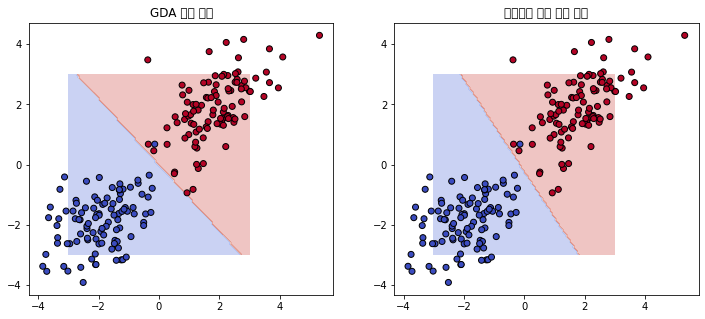

In [5]:
# 2D 결정 경계 시각화
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z_gda = predict_gda(grid_points).reshape(xx.shape)
Z_log = log_reg.predict(grid_points).reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].contourf(xx, yy, Z_gda, alpha=0.3, cmap="coolwarm")
ax[0].scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap="coolwarm")
ax[0].set_title("GDA 결정 경계")

ax[1].contourf(xx, yy, Z_log, alpha=0.3, cmap="coolwarm")
ax[1].scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap="coolwarm")
ax[1].set_title("로지스틱 회귀 결정 경계")

plt.show()


## **📌 8. GDA의 장점과 단점**

### **🔹 GDA의 장점**

✅ **닫힌 해(Closed-form Solution) 사용 가능**

- 모델이 가우시안 분포를 따른다면, 직접적인 해를 구할 수 있어 계산이 빠름.

✅ **빠른 학습 속도**

- 학습 과정에서 반복적인 최적화(경사 하강법 등)가 필요하지 않음.

✅ **확률적 모델링이 가능**

- 모델이 단순한 선형 분류기보다 더 많은 정보를 포함할 수 있음.

✅ **베이즈 정리를 활용한 확률적 예측 가능**

- 확률적 예측이 가능하여 모델의 불확실성을 측정할 수 있음.

---

### **🔹 GDA의 단점**

❌ **가우시안 분포 가정이 필요함**

- 만약 데이터가 정규 분포를 따르지 않는다면 GDA의 성능이 저하될 수 있음.

❌ **공분산 행렬이 모든 클래스에서 동일해야 함**

- 클래스별로 공분산 행렬이 다를 경우, GDA의 성능이 낮아질 수 있음.

❌ **로지스틱 회귀와 같은 판별 모델보다 유연성이 낮음**

- 가우시안 분포를 가정하지 않는 판별 모델(예: 로지스틱 회귀)이 더 나은 결과를 제공할 수 있음.

---

## **📌 10. GDA의 결정 경계와 확률적 해석**

### **🔹 GDA의 결정 경계가 선형일 조건**

✅ GDA의 결정 경계가 **항상 선형이 되는 것은 아님**

✅ 결정 경계가 선형이 되려면, **공분산 행렬이 모든 클래스에서 동일해야 함**

✅ 만약 클래스별로 공분산이 다르면, 결정 경계는 **이차형(Quadratic)** 형태를 가질 수 있음

### **🔹 GDA의 결정 경계를 해석하는 방법**

- 데이터가 가우시안 분포를 따르는 경우, GDA는 **최적의 결정 경계**를 찾을 수 있음.
- 하지만, 데이터가 정규 분포를 따르지 않는다면 **로지스틱 회귀**가 더 좋은 성능을 낼 수 있음.

---

## **📌 11. GDA를 실제 문제에 적용하는 방법**

✅ **GDA를 적용할 때 고려할 점**

1. **데이터가 정규 분포를 따르는지 확인**
    - GDA는 데이터가 정규 분포를 따른다는 가정을 하므로, 이를 검증하는 것이 중요함.
2. **클래스별 공분산 행렬이 동일한지 확인**
    - 공분산 행렬이 클래스마다 다르면, GDA 대신 다른 방법(예: Quadratic Discriminant Analysis, QDA)을 고려할 수 있음.
3. **모델의 성능을 비교하여 선택**
    - GDA와 로지스틱 회귀를 비교하여 더 좋은 성능을 보이는 모델을 선택해야 함.

QDA를 적용하는 코드
공분산 행렬이 클래스마다 다를 경우, 즉 GDA의 가정을 깨면 결정 경계가 비선형이 될 수 있습니다. 이 경우 QDA로 확장하여 사용

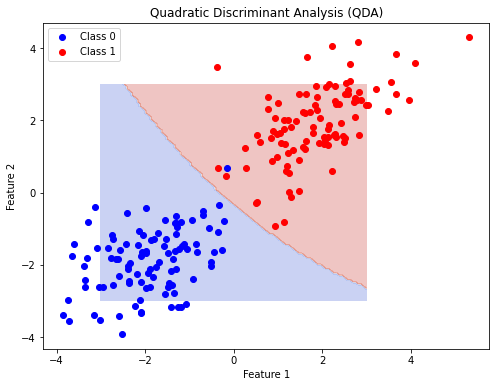

In [6]:
# 클래스별 공분산을 다르게 계산
sigma_0_hat = np.cov(X[Y == 0].T, bias=True)
sigma_1_hat = np.cov(X[Y == 1].T, bias=True)

def predict_qda(X):
    """QDA를 사용한 예측 (클래스별 공분산 행렬 적용)"""
    p_x_given_y0 = multivariate_normal.pdf(X, mean=mu_0_hat, cov=sigma_0_hat)
    p_x_given_y1 = multivariate_normal.pdf(X, mean=mu_1_hat, cov=sigma_1_hat)
    
    p_y0_x = p_x_given_y0 * (1 - phi)
    p_y1_x = p_x_given_y1 * phi
    
    return (p_y1_x > p_y0_x).astype(int)

# QDA 기반 결정 경계 그리기
Z_qda = predict_qda(grid_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_qda, alpha=0.3, cmap="coolwarm")
plt.scatter(X0[:, 0], X0[:, 1], label="Class 0", color="blue")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", color="red")
plt.legend()
plt.title("Quadratic Discriminant Analysis (QDA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
